In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
training_data=pd.read_csv("trainRegression.csv")
training_data.head()

,X,R
0,0.01,-0.2730
1,0.02,-0.1170
2,0.03,-0.3090
3,0.04,0.0306
4,0.05,-0.0802


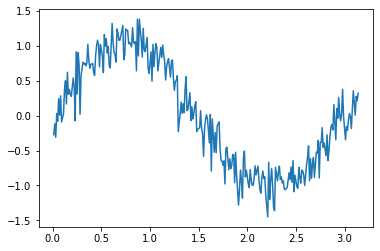

In [5]:
trainX=np.array(training_data['X'])
trainY=np.array(training_data['R'])
plt.plot(trainX,trainY)

In [10]:
m=trainX.shape
sum_a=np.sum(trainX)
sum_b=np.sum(np.multiply(trainX,trainX))
sum_c=np.sum(trainY)
sum_d=np.sum(np.multiply(trainX,trainY))
matA=np.array([[m[0],sum_a],[sum_a,sum_b]])
matB=np.array([[sum_c],[sum_d]])

print(matA)
print(matB)

[[283.     444.95  ]
 [444.95   932.7465]]
[[   1.39087  ]
 [-126.6414295]]


In [11]:
invA=np.linalg.inv(matA)
res=np.dot(invA,matB)
print(res)

[[ 0.8736061 ]
 [-0.55251074]]


In [12]:
test_data=pd.read_csv("testRegression.csv")
test_data.head()

,X,R
0,0.0,-0.226
1,0.1,-0.174
2,0.2,0.459
3,0.3,0.638
4,0.4,0.869


In [14]:
#Linear Regression
testX=np.array(test_data['X'])
testY=np.array(test_data['R'])
test=np.array([np.ones(testX.shape),testX])

theta=np.array([[res[0,0],res[1,0]]])
print(theta)

[[ 0.8736061  -0.55251074]]


Mean square error:  0.3159321720459774


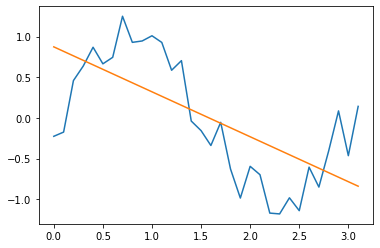

In [15]:
yprime=np.dot(theta,test)
testy1=np.array([testY])
n=test_data.shape[0]
msq=(np.sum(np.multiply((yprime-testy1),(yprime-testy1))))/(n)
print("Mean square error: ", msq)

plt.plot(testX,testY,testX,yprime[0,:])

In [20]:
#Quadratic Regression
m=trainX.shape
sumxi1=np.sum(trainX)
sumxi2=np.sum(np.multiply(trainX,trainX))
sumxi3=np.sum(np.multiply(np.multiply(trainX,trainX),trainX))
sumxi4=np.sum(np.multiply(np.multiply(np.multiply(trainX,trainX),trainX),trainX))
sumyi1=np.sum(trainY)
sumyixi1=np.sum(np.multiply(trainY,trainX))
sumyixi2=np.sum(np.multiply(trainY,np.multiply(trainX,trainX)))

A=np.array([[m[0],sumxi1,sumxi2],[sumxi1,sumxi2,sumxi3],[sumxi2,sumxi3,sumxi4]])
print(A)

[[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]


In [21]:
B=np.array([[sumyi1],[sumyixi1],[sumyixi2]])
print(B)

[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]


In [23]:
InverseA=np.linalg.inv(A)
res=np.dot(InverseA,B)
print(res)

[[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


In [24]:
test=np.array([np.ones(testX.shape),testX,np.multiply(testX,testY)])
theta=np.array([[res[0,0],res[1,0],res[2,0]]])
print(theta)

[[ 1.10611454 -0.99606599  0.14104585]]


Mean square error:  0.3649906162814853


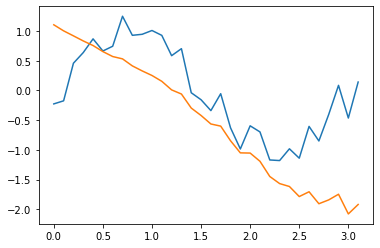

In [25]:
yprime=np.dot(theta,test)
testy1=np.array([testY])
n=test_data.shape[0]
msq=(np.sum(np.multiply((yprime-testy1),(yprime-testy1))))/(2*n)

print("Mean square error: ", msq)
plt.plot(testX,testY,testX,yprime[0,:])

In [26]:
#cubic Regression
m=trainX.shape
sumxi1=np.sum(trainX)
sumxi2=np.sum(np.multiply(trainX,trainX))
sumxi3=np.sum(np.multiply(np.multiply(trainX,trainX),trainX))
sumxi4=np.sum(np.multiply(np.multiply(np.multiply(trainX,trainX),trainX),trainX))
sumxi5=np.sum(np.multiply(np.multiply(np.multiply(np.multiply(trainX,trainX),trainX),trainX),trainX))
sumxi6=np.sum(np.multiply(np.multiply(np.multiply(np.multiply(np.multiply(trainX,trainX),trainX),trainX),trainX),trainX))
sumyi1=np.sum(trainY)
sumyixi1=np.sum(np.multiply(trainY,trainX))
sumyixi2=np.sum(np.multiply(trainY,np.multiply(trainX,trainX)))
sumyixi3=np.sum(np.multiply(trainY,np.multiply(np.multiply(trainX,trainX),trainX)))
A=np.array([[m[0],sumxi1,sumxi2,sumxi3],[sumxi1,sumxi2,sumxi3,sumxi4],[sumxi2,sumxi3,sumxi4,sumxi5],[sumxi3,sumxi4,sumxi5,sumxi6]])
B=np.array([[sumyi1],[sumyixi1],[sumyixi2],[sumyixi3]])

print(A)
print(B)

[[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]
[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]


In [27]:
InverseA=np.linalg.inv(A)
res=np.dot(InverseA,B)
print(res)

[[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]


Mean square error:  0.025771028845477974


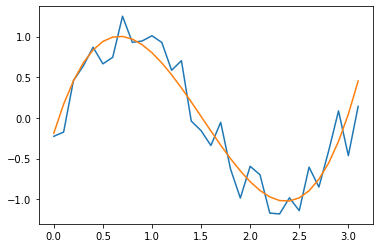

In [29]:
test=np.array([np.ones(testX.shape),testX,np.multiply(testX,testX),np.multiply(np.multiply(testX,testX),testX)])
theta=np.array([[res[0,0],res[1,0],res[2,0],res[3,0]]])
yprime=np.dot(theta,test)
testy1=np.array([testY])
n=test_data.shape[0]
msq=(np.sum(np.multiply((yprime-testy1),(yprime-testy1))))/(2*n)
print("Mean square error: ", msq)
plt.plot(testX,testY,testX,yprime[0,:])